In [ ]:
import os
import path_file
os.chdir(os.path.dirname(os.path.dirname(path_file.__file__)))
os.getcwd()

In [31]:
import sys
import cantera as ct
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

import phases
import feedstock as fs
import fuel as fu
import energy as en
import gasifier as gs

In [32]:
fuel = fs.create_fuel_stream(1, [50, 6, 44, 0, 0, 0], 0, 0.16)
f = fuel.get_fuel_formula()
MW = f[0]*phases.Mw['C'] + f[1]*phases.Mw['H'] + f[2]*phases.Mw['O']
HHV = 449.568 / MW
fuel = fs.create_fuel_stream(1, [50, 6, 44, 0, 0, 0], 0, 0.16, HHV)
AFRs = np.arange(0.6, 2+1E-6, 0.1)
OUTs = []

for i, afr in enumerate(AFRs):
    air = fs.create_air_stream(afr)
    outlet = gs.gasify_nonisot(fuel, air)
    OUTs.append(outlet)


d:\user\Desktop\Faculdade\gasification\phases.py:149: RuntimeWarning: invalid value encountered in double_scalars
  self.fuelAshMW = ashMass / ashMoles # updates attribute
d:\user\Desktop\Faculdade\gasification\phases.py:150: RuntimeWarning: invalid value encountered in double_scalars
  self.fuelAshHF = ash_hFormation_absolute / ashMoles


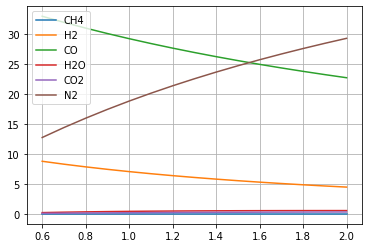

In [33]:
plt.plot(AFRs, [100*out.get_syngas_fraction('CH4', water=True,) for out in OUTs], label='CH4')
plt.plot(AFRs, [100*out.get_syngas_fraction('H2') for out in OUTs], label='H2')
plt.plot(AFRs, [100*out.get_syngas_fraction('CO') for out in OUTs], label='CO')
plt.plot(AFRs, [100*out.get_syngas_fraction('H2O') for out in OUTs], label='H2O')
plt.plot(AFRs, [100*out.get_syngas_fraction('CO2') for out in OUTs], label='CO2')
plt.plot(AFRs, [100*out.get_syngas_fraction('N2') for out in OUTs], label='N2')
plt.legend()
plt.grid()
plt.show()